# **Implementation CNN with TensorFlow/Keras**

Script implements a Convolutional Neural Network (CNN) using TensorFlow/Keras to classify handwritten digits from the MNIST dataset.

## **Implementation**

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')

#### **Load Data**

In [49]:
train = pd.read_csv("train.csv")
print(f"Train data shape: {train.shape}")
train.head()

test = pd.read_csv("test.csv")
print(f"Test data shape: {test.shape}")
test.head()

Train data shape: (42000, 785)
Test data shape: (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Separate labels from features**

In [50]:
Y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)

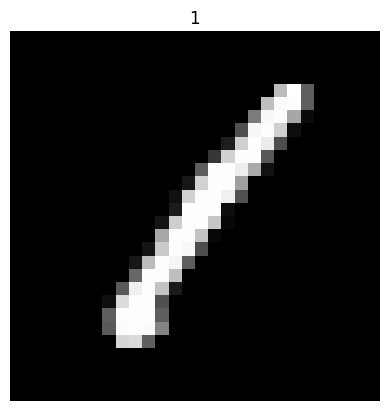

In [51]:
img = X_train.iloc[0].to_numpy()  
img = img.reshape((28, 28)) 

# Plot the image
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0, 0]) 
plt.axis("off") 
plt.show()

#### **Normalize pixel values to be between 0 and 1**

In [52]:
X_train = X_train / 255.0
test = test / 255.0

#### **Reshape data to (28, 28, 1) format for CNN**

In [53]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

#### **One-hot encode the labels**

In [54]:
Y_train = to_categorical(Y_train, num_classes=10)
print(f"Encoded Y_train shape: {Y_train.shape}")

Encoded Y_train shape: (42000, 10)


#### **Split data into training and validation sets**

In [55]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")


Training set shape: (37800, 28, 28, 1)
Validation set shape: (4200, 28, 28, 1)


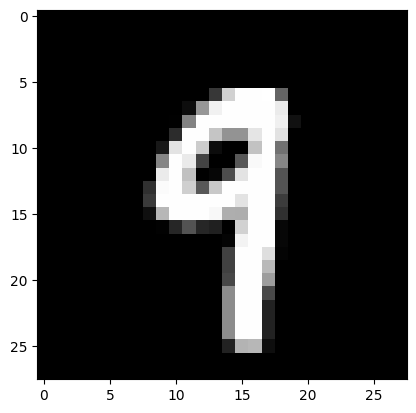

In [56]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

#### **Data augmentation**

In [57]:
atagen = ImageDataGenerator(
    rotation_range=10,  # Randomly rotate images by up to 10 degrees
    zoom_range=0.1,  # Randomly zoom images by up to 10%
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10%
    horizontal_flip=False,  # No horizontal flip
    vertical_flip=False  # No vertical flip
)
datagen.fit(X_train)


#### **Build the CNN model**

In [58]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer 4
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output for the fully connected layer
model.add(Flatten())

# Dense Layer 1
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Dense Layer 2
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))


#### **Compile the model with Adam optimizer**

In [59]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

#### **Fit the model with data augmentation**

In [60]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=128),
    epochs=10,
    validation_data=(X_val, Y_val),
    steps_per_epoch=X_train.shape[0] // 128
)


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 39s 123ms/step - accuracy: 0.4354 - loss: 1.5380 - val_accuracy: 0.9562 - val_loss: 0.1345
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9219 - loss: 0.2301 - val_accuracy: 0.9550 - val_loss: 0.1419
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 36s 122ms/step - accuracy: 0.9298 - loss: 0.2369 - val_accuracy: 0.9788 - val_loss: 0.0673
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9609 - loss: 0.1388 - val_accuracy: 0.9795 - val_loss: 0.0660
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 36s 122ms/step - accuracy: 0.9571 - loss: 0.1500 - val_accuracy: 0.9838 - val_loss: 0.0580
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9375 - loss: 0.1842 - val_accuracy: 0.9840 - val_loss: 0.0571
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 36s 121ms/step - accuracy: 0.9613 - loss: 0.1410 - val_accuracy: 0.9840 - val_loss: 0.0594
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9297 - loss: 0.3106 - val_

#### **Visulization**

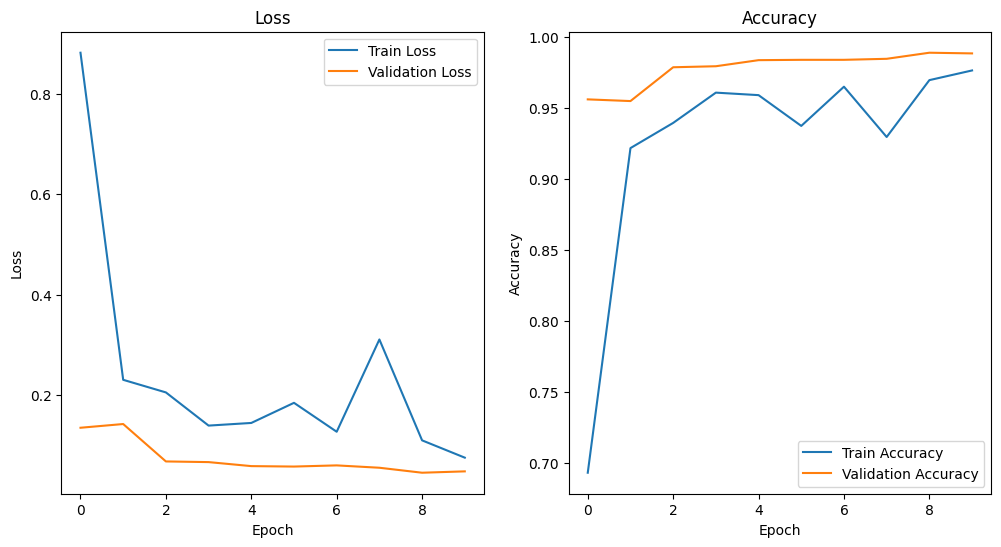

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


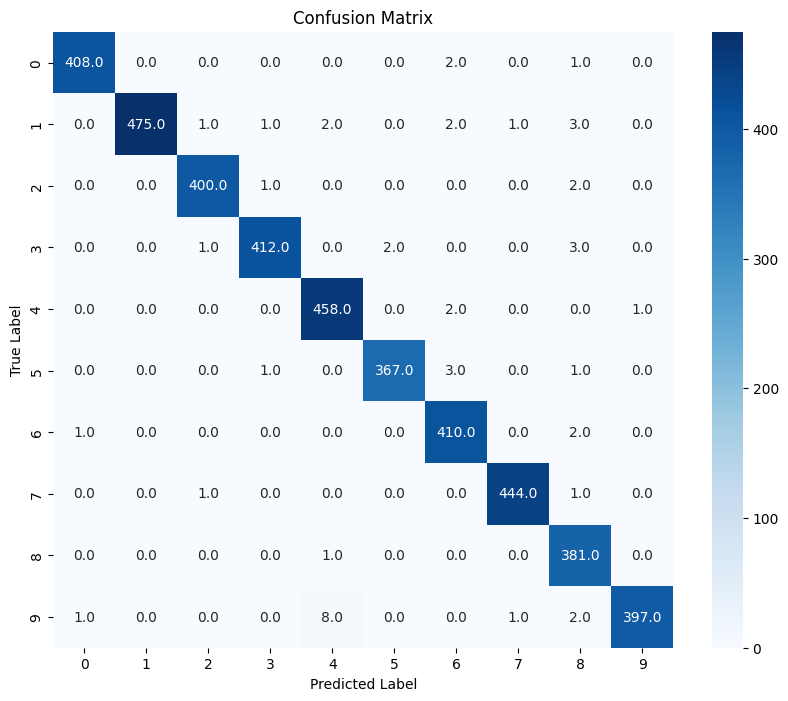

In [61]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Confusion Matrix
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
